In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
df['Product ID'] = df['Product ID'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Failure Type'] = df['Failure Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   UDI                      10000 non-null  int64   
 1   Product ID               10000 non-null  category
 2   Type                     10000 non-null  category
 3   Air temperature [K]      10000 non-null  float64 
 4   Process temperature [K]  10000 non-null  float64 
 5   Rotational speed [rpm]   10000 non-null  int64   
 6   Torque [Nm]              10000 non-null  float64 
 7   Tool wear [min]          10000 non-null  int64   
 8   Target                   10000 non-null  int64   
 9   Failure Type             10000 non-null  category
dtypes: category(3), float64(3), int64(4)
memory usage: 922.6 KB


In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Failure Type'].unique()

['No Failure', 'Power Failure', 'Tool Wear Failure', 'Overstrain Failure', 'Random Failures', 'Heat Dissipation Failure']
Categories (6, object): ['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure', 'Power Failure', 'Random Failures', 'Tool Wear Failure']

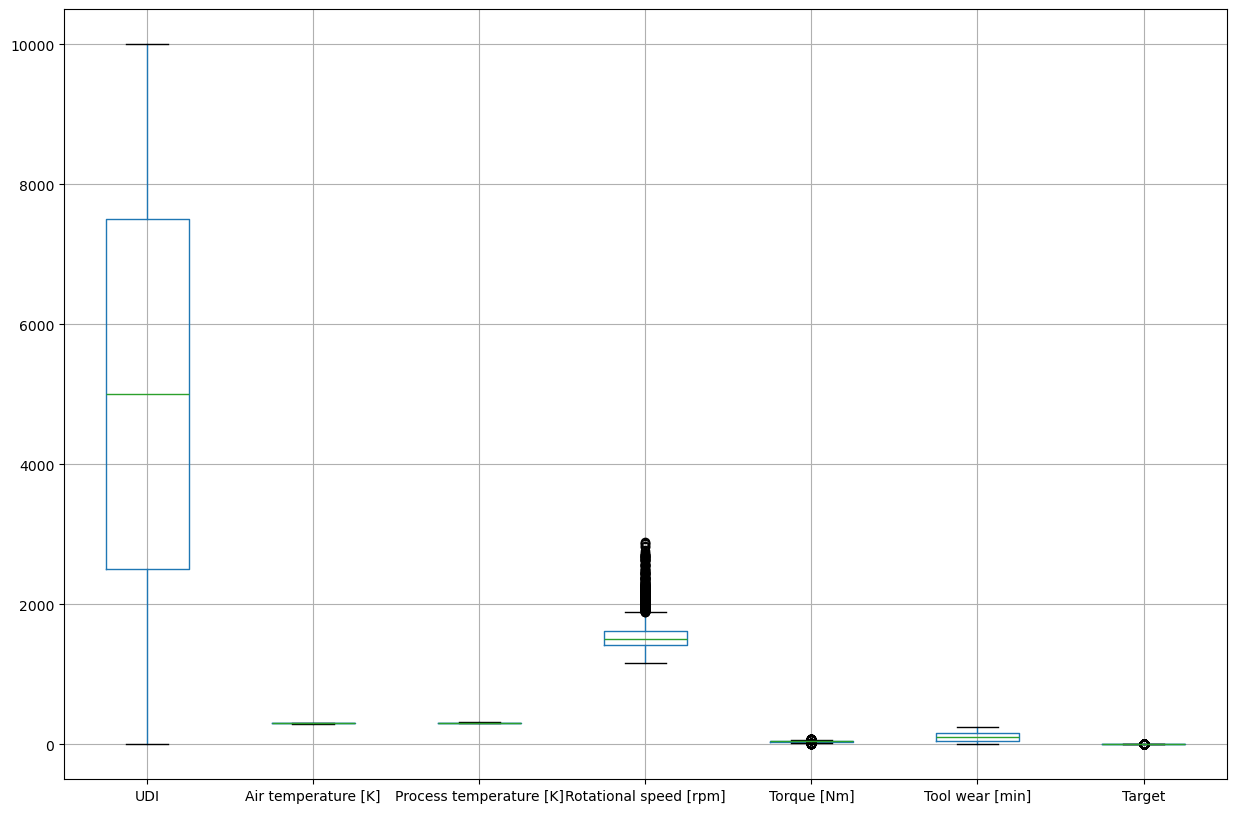

In [9]:
df.boxplot(figsize=(15,10))
plt.show()


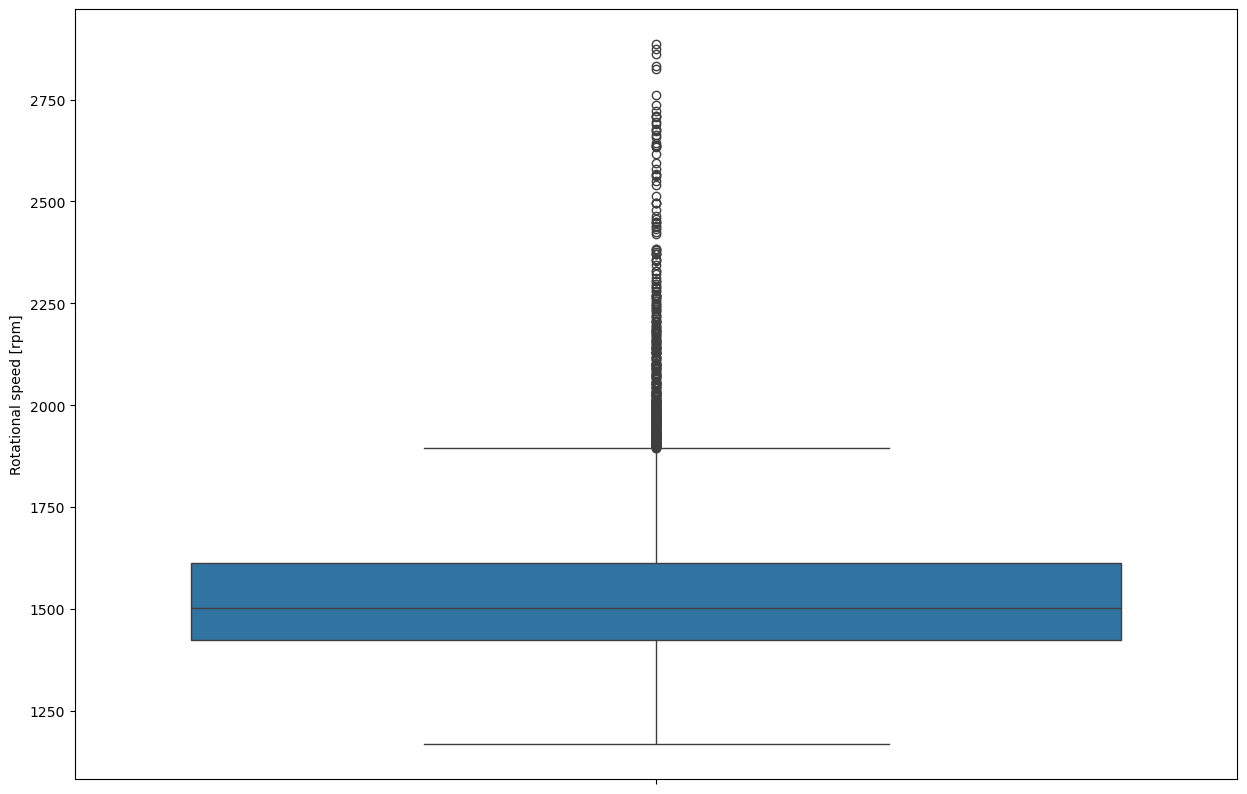

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df['Rotational speed [rpm]'])
plt.show()

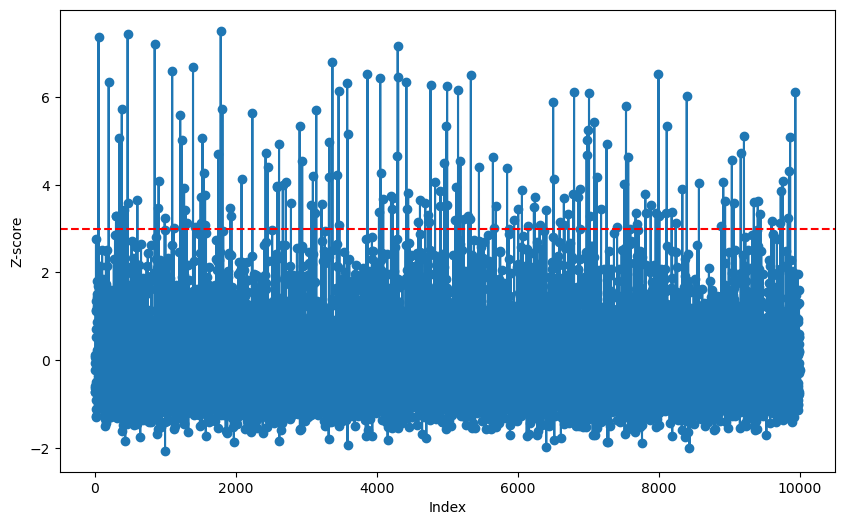

In [11]:
df['z_score'] = (df['Rotational speed [rpm]'] - df['Rotational speed [rpm]'].mean()) / df['Rotational speed [rpm]'].std()

plt.figure(figsize=(10, 6))
plt.plot(df['z_score'],marker='o')
plt.axhline(y=3, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-score')
plt.show()

In [12]:
from scipy.stats import skew

skewness = skew(df['Rotational speed [rpm]'])
print(f'Skewness: {skewness}')

Skewness: 1.9928720166048546


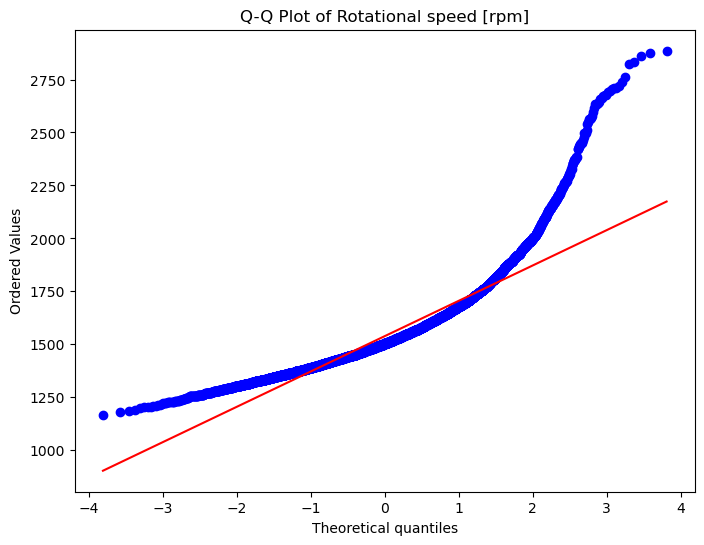

In [13]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Rotational speed [rpm]'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Rotational speed [rpm]')
plt.show()

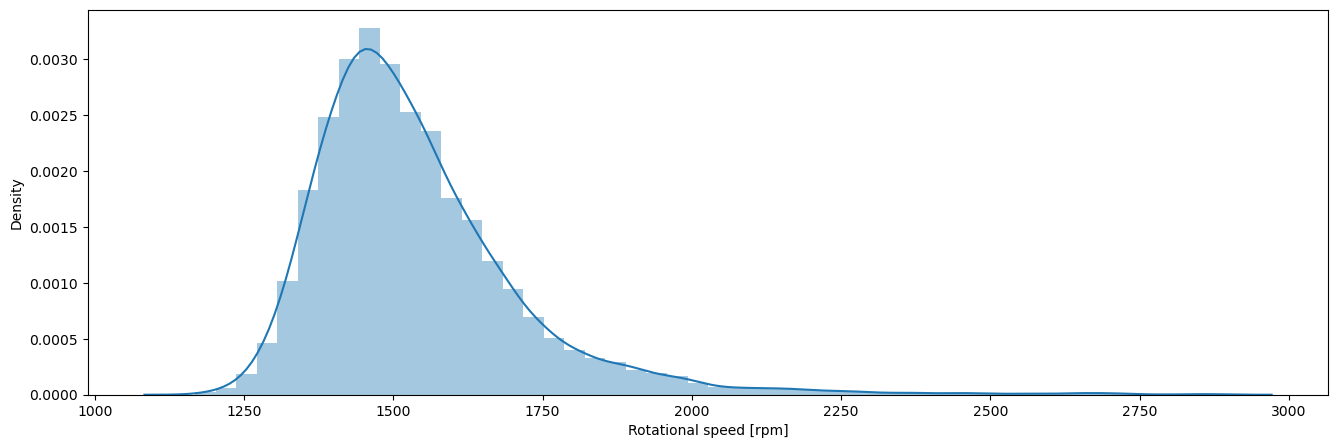

In [14]:
plt.figure(figsize=(16,5))
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [15]:
print('Highest allowed',df['Rotational speed [rpm]'].mean() + 3*df['Rotational speed [rpm]'].std())
print('Lowest allowed',df['Rotational speed [rpm]'].mean() - 3*df['Rotational speed [rpm]'].std())

Highest allowed 2076.628387740279
Lowest allowed 1000.9238122597212


In [16]:
q1 = df['Rotational speed [rpm]'].quantile(0.25)
q3 = df['Rotational speed [rpm]'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr


df = df[(df['Rotational speed [rpm]'] >= lower_limit) & (df['Rotational speed [rpm]'] <= upper_limit)]


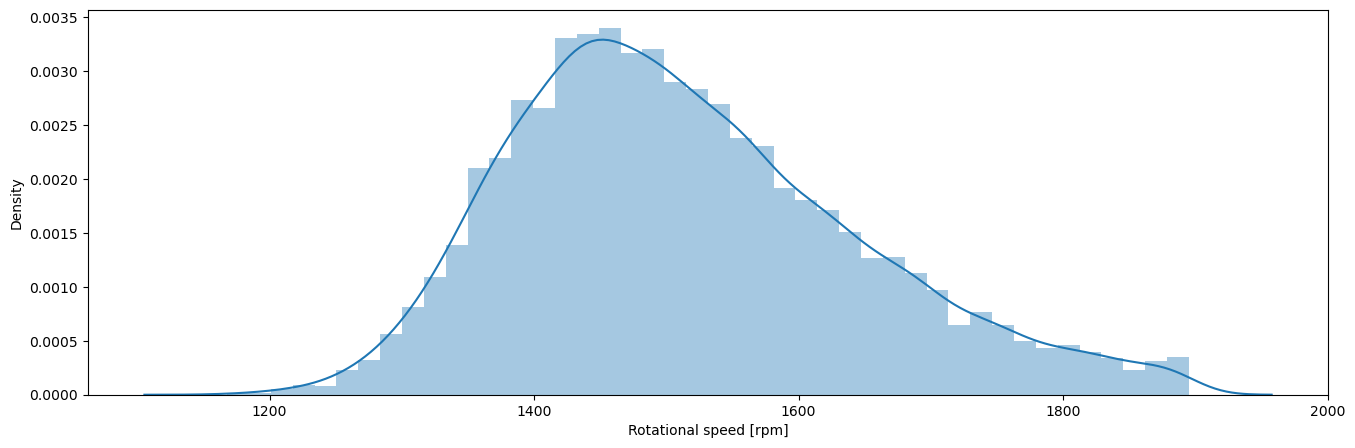

In [17]:
plt.figure(figsize=(16,5))
sns.distplot(df['Rotational speed [rpm]'])
plt.show()

In [18]:
df.drop(columns='z_score',inplace=True)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [19]:
corr = df.corr(numeric_only=True)
corr

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.114952,0.322722,0.001196,-0.000469,-0.012291,-0.017987
Air temperature [K],0.114952,1.000000,0.875657,0.011249,-0.004665,0.016536,0.088197
Process temperature [K],0.322722,0.875657,1.000000,0.014816,-0.009516,0.015994,0.038407
Rotational speed [rpm],0.001196,0.011249,0.014816,1.000000,-0.890897,0.006252,-0.196548
Torque [Nm],-0.000469,-0.004665,-0.009516,-0.890897,1.000000,-0.005996,0.272304
Tool wear [min],-0.012291,0.016536,0.015994,0.006252,-0.005996,1.000000,0.112843
Target,-0.017987,0.088197,0.038407,-0.196548,0.272304,0.112843,1.000000


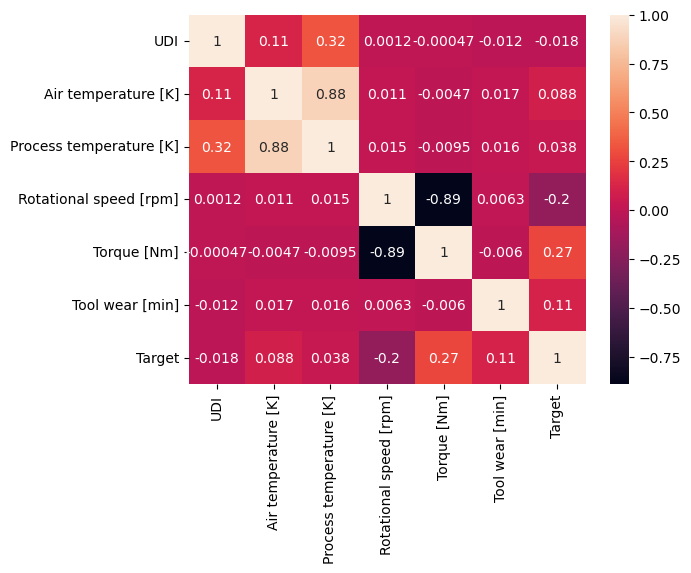

In [20]:
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

df['Normalized Rotational Speed'] = df['Rotational speed [rpm]'] / df['Rotational speed [rpm]'].max()

df['High Torque Indicator'] = df['Torque [Nm]'].apply(lambda x: 1 if x > 45 else 0)

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,0.818470,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,0.743008,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,0.790501,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,0.756201,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,0.743008,0


In [22]:
corr = df.corr(numeric_only=True)
corr

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
UDI,1.000000,0.114952,0.322722,0.001196,-0.000469,-0.012291,-0.017987,0.248597,0.001196,0.001631
Air temperature [K],0.114952,1.000000,0.875657,0.011249,-0.004665,0.016536,0.088197,-0.698788,0.011249,0.002312
Process temperature [K],0.322722,0.875657,1.000000,0.014816,-0.009516,0.015994,0.038407,-0.266442,0.014816,-0.005414
Rotational speed [rpm],0.001196,0.011249,0.014816,1.000000,-0.890897,0.006252,-0.196548,-0.000506,1.000000,-0.639933
Torque [Nm],-0.000469,-0.004665,-0.009516,-0.890897,1.000000,-0.005996,0.272304,-0.004784,-0.890897,0.788167
Tool wear [min],-0.012291,0.016536,0.015994,0.006252,-0.005996,1.000000,0.112843,-0.009312,0.006252,-0.006551
Target,-0.017987,0.088197,0.038407,-0.196548,0.272304,0.112843,1.000000,-0.119136,-0.196548,0.210720
Temperature Difference,0.248597,-0.698788,-0.266442,-0.000506,-0.004784,-0.009312,-0.119136,1.000000,-0.000506,-0.012634
Normalized Rotational Speed,0.001196,0.011249,0.014816,1.000000,-0.890897,0.006252,-0.196548,-0.000506,1.000000,-0.639933
High Torque Indicator,0.001631,0.002312,-0.005414,-0.639933,0.788167,-0.006551,0.210720,-0.012634,-0.639933,1.000000


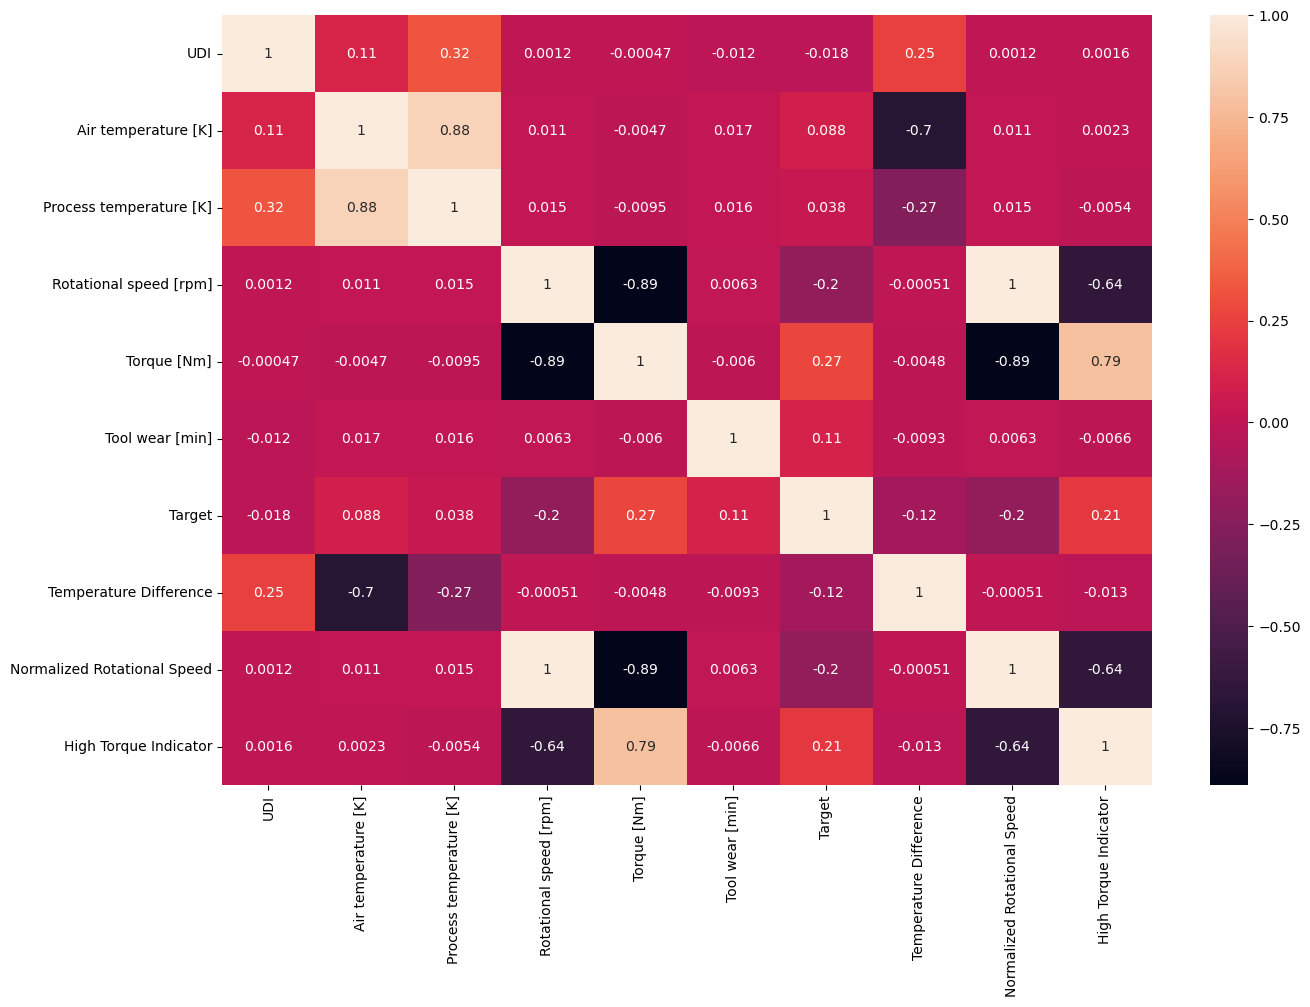

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

In [24]:
df.drop(columns=['UDI','Product ID','Target'],inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Temperature Difference,Normalized Rotational Speed,High Torque Indicator
0,M,298.1,308.6,1551,42.8,0,No Failure,10.5,0.818470,0
1,L,298.2,308.7,1408,46.3,3,No Failure,10.5,0.743008,1
2,L,298.1,308.5,1498,49.4,5,No Failure,10.4,0.790501,1
3,L,298.2,308.6,1433,39.5,7,No Failure,10.4,0.756201,0
4,L,298.2,308.7,1408,40.0,9,No Failure,10.5,0.743008,0


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Failure Type')
y = df['Failure Type']

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=df['Failure Type'] ,test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7665, 9), (1917, 9), (7665,), (1917,))

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
}

Decision Tree accuracy: 0.98
Random Forest accuracy: 0.98
K-Nearest Neighbors accuracy: 0.97
Logistic Regression accuracy: 0.98
Support Vector Machine accuracy: 0.97


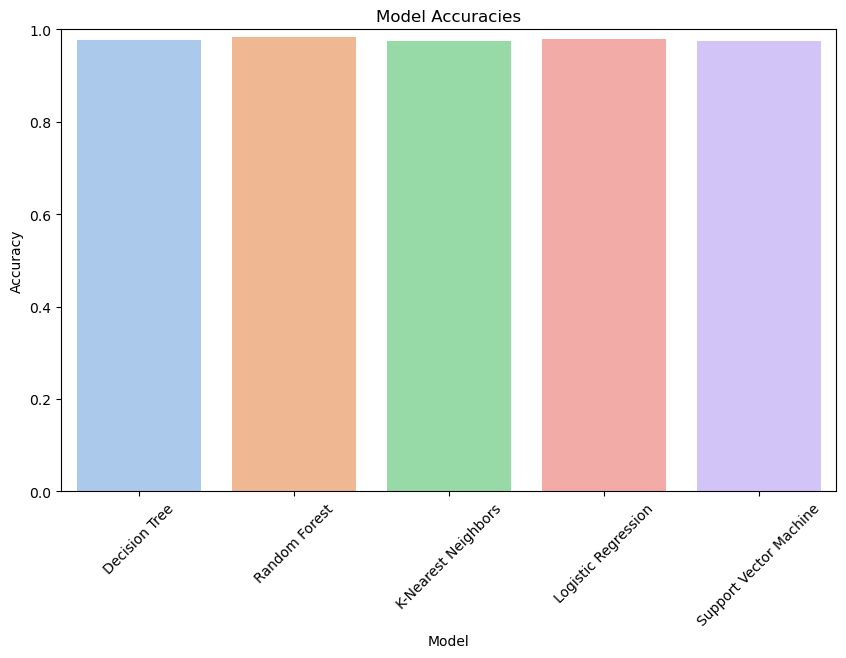

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_names = []
accuracies = []

for name, clf in models.items():
    clf.fit(processed_x_train, y_train)
    score = clf.score(processed_x_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [30]:
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(processed_x_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.show()

Evaluating Decision Tree...
Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.95      0.98        22
              No Failure       0.99      0.99      0.99      1854
      Overstrain Failure       0.64      0.56      0.60        16
           Power Failure       0.70      0.54      0.61        13
         Random Failures       0.00      0.00      0.00         4
       Tool Wear Failure       0.00      0.00      0.00         8

                accuracy                           0.98      1917
               macro avg       0.56      0.51      0.53      1917
            weighted avg       0.98      0.98      0.98      1917

Evaluating Random Forest...
Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      0.95      0.98        22
              No Failure       0.99      1.00      0.99      1854
      Overstrain Failure       0.75 